In [1]:
import json
def get_acc_list(file_path: str, users: int, metric="test_acc") -> list:
    acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    acc_lines = lines[-users:]
    print(acc_lines)
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            acc_list.append(acc_data['Results_raw'][metric])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    acc_list = [round(float(acc), 4) for acc in acc_list]
    return acc_list

In [2]:
def get_avg_acc_list(file_path: str, rounds: int, metric="test_acc") -> float:
    avg_acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    acc_lines = lines[:rounds]
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            avg_acc_list.append(acc_data['Results_weighted_avg'][metric])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    avg_acc_list = [round(float(acc), 4) for acc in avg_acc_list]
    return avg_acc_list


In [3]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每轮平均准确率，帮我在一张图上使用matplotlib绘制每个实验的平均准确率曲线
import matplotlib.pyplot as plt
import numpy as np

def plot_avg_accuracy(exp_datas: dict):
    # 设置更大的图形尺寸和更高的分辨率
    plt.figure(figsize=(14, 8), dpi=100)
    
    # 设置美观的样式
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # 定义更清晰鲜明的颜色，使用高对比度和饱和度的颜色
    colors = [
        '#FF0000',  # 鲜红色
        '#0066FF',  # 鲜蓝色
        '#00CC00',  # 鲜绿色
        '#FF6600',  # 橙色
        '#9900CC',  # 紫色
        '#CC0066',  # 洋红色
        '#00CCCC',  # 青色
        '#666600',  # 橄榄色
        '#FF3399',  # 粉红色
        '#006600'   # 深绿色
    ]
    line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

    for i, (exp_name, acc_list) in enumerate(exp_datas.items()):
        rounds = range(1, len(acc_list) + 1)
        
        # 绘制曲线，使用不同的颜色、线型和标记
        plt.plot(rounds, acc_list, 
                label=exp_name,
                color=colors[i % len(colors)],
                linestyle=line_styles[i % len(line_styles)],
                marker=markers[i % len(markers)],
                markersize=6,
                markevery=max(1, len(acc_list)//20),  # 每20个点显示一个标记，避免过于密集
                linewidth=3,  # 增加线条宽度到3，使其更清晰
                alpha=0.9)    # 增加透明度到0.9，使颜色更饱和
    
    # 设置标题和标签，增加字体大小
    plt.title('Average Accuracy Over Training Rounds', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Training Rounds', fontsize=14, fontweight='bold')
    plt.ylabel('Average Accuracy', fontsize=14, fontweight='bold')
    
    # 设置图例
    plt.legend(loc='upper left', fontsize=16, 
              frameon=True, fancybox=True, shadow=True)
    
    # 设置网格样式
    plt.grid(True, alpha=1, linestyle='--', linewidth=0.8)
    
    # 设置坐标轴
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # 设置y轴范围，让图形更清晰
    if exp_datas:
        all_values = [val for acc_list in exp_datas.values() for val in acc_list]
        y_min, y_max = min(all_values), max(all_values)
        y_range = y_max - y_min
        plt.ylim(y_min - 0.05 * y_range, y_max + 0.05 * y_range)
    
    # 调整布局
    plt.tight_layout()
    
    # 显示图形
    plt.show()

In [4]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每个用户的准确率，帮我在一张图上使用matplotlib绘制每个实验的用户准确率分布的箱线图
def plot_user_accuracy(exp_datas: dict):
    # 设置更大的图形尺寸和更高的分辨率
    plt.figure(figsize=(14, 8), dpi=100)
    
    # 设置美观的样式
    plt.style.use('seaborn-v0_8-whitegrid')  # 使用seaborn样式
    
    # 准备数据
    data = [exp_datas[exp_name] for exp_name in exp_datas.keys()]
    labels = list(exp_datas.keys())
    
    # 创建颜色调色板
    colors = plt.cm.Set3(range(len(labels)))  # 使用Set3颜色映射
    
    # 绘制箱线图，添加更多美观设置
    box_plot = plt.boxplot(data, 
                          labels=labels,
                          patch_artist=True,  # 允许填充颜色
                          notch=True,         # 添加置信区间凹槽
                          showmeans=True,     # 显示均值
                          meanline=True,      # 均值显示为线条
                          showfliers=True,    # 显示异常值
                          flierprops=dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.7),  # 异常值样式
                          meanprops=dict(color='red', linewidth=2),  # 均值线样式
                          medianprops=dict(color='darkblue', linewidth=2),  # 中位数线样式
                          whiskerprops=dict(color='black', linewidth=1.5),  # 须线样式
                          capprops=dict(color='black', linewidth=1.5))  # 帽线样式
    
    # 为每个箱子设置不同的颜色
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)  # 设置透明度
        patch.set_edgecolor('black')  # 设置边框颜色
        patch.set_linewidth(1.5)  # 设置边框宽度
    
    # 设置标题和标签，增加字体大小
    plt.title('User Accuracy Distribution Across Experiments', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Experiments', fontsize=14, fontweight='bold')
    plt.ylabel('User Accuracy', fontsize=14, fontweight='bold')
    
    # 设置网格样式
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    
    # 旋转x轴标签，避免重叠
    plt.xticks(rotation=0, ha='center', fontsize=16)
    plt.yticks(fontsize=16)
    
    # 调整布局，避免标签被截断
    plt.tight_layout()
    
    # 添加图例说明
    legend_elements = [
        plt.Line2D([0], [0], color='darkblue', lw=2, label='Median'),
        plt.Line2D([0], [0], color='red', lw=2, label='Mean'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                  markersize=12, alpha=0.7, label='Outliers', linestyle='None')
    ]
    plt.legend(handles=legend_elements, loc='upper left', fontsize=10)
    
    # 显示图形
    plt.show()

In [5]:
# USERS = 40
# ROUNDS = 500
# exp_paths = {
#     "ditto": "exp/ditto_pacs_resnet10_on_pacs_lr0.01_lstep1", 
#     "fedavg": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fedprox": "exp/fedprox_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fedbn": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250815040230",
#     "local": "exp/local_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "mix": "exp/mix_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fdse": "exp/fdse_fdse_resnet10_on_pacs_lr0.01_lstep1",
#     "pfedme": "exp/PFedMe_pacs_resnet10_on_pacs_lr0.01_lstep1"
# }
# exp_acc_for_users = {}
# exp_acc_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     print(f"Processing experiment: {exp_name} at {exp_path}")
#     acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
#     avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
#     exp_acc_for_users[exp_name] = acc_list
#     exp_acc_for_rounds[exp_name] = avg_acc_list
# plot_avg_accuracy(exp_acc_for_rounds)
# plot_user_accuracy(exp_acc_for_users)

Processing experiment: ours at exp_office_caltech_alexnet/fdse_fdse_alexnet_on_office_caltech_lr0.01_lstep2
["{'Role': 'Client #1', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.5324278905473907, 'test_correct': 152.0, 'test_acc': 0.6551724137931034, 'test_loss': 355.52327060699463, 'test_total': 232, 'val_avg_loss': 1.058246180325925, 'val_correct': 249.0, 'val_acc': 0.7455089820359282, 'val_loss': 353.45422422885895, 'val_total': 334}}\n", "{'Role': 'Client #2', 'Round': 500, 'Results_raw': {'test_avg_loss': 3.7277634214646747, 'test_correct': 38.0, 'test_acc': 0.37623762376237624, 'test_loss': 376.50410556793213, 'test_total': 101, 'val_avg_loss': 3.5454379300165444, 'val_correct': 87.0, 'val_acc': 0.4860335195530726, 'val_loss': 634.6333894729614, 'val_total': 179}}\n", "{'Role': 'Client #3', 'Round': 500, 'Results_raw': {'test_avg_loss': 3.8496546586354574, 'test_correct': 39.0, 'test_acc': 0.325, 'test_loss': 461.9585590362549, 'test_total': 120, 'val_avg_loss': 1.971846818923

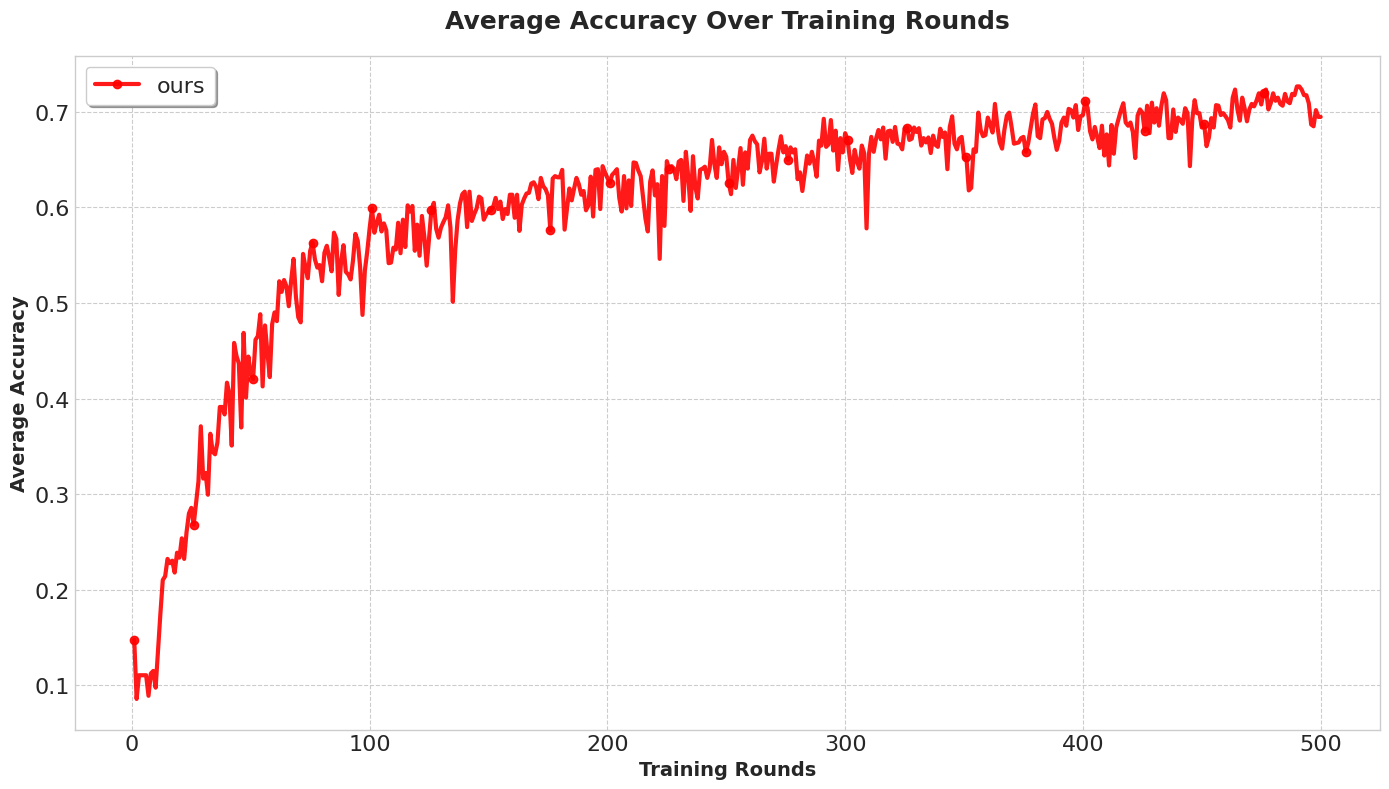

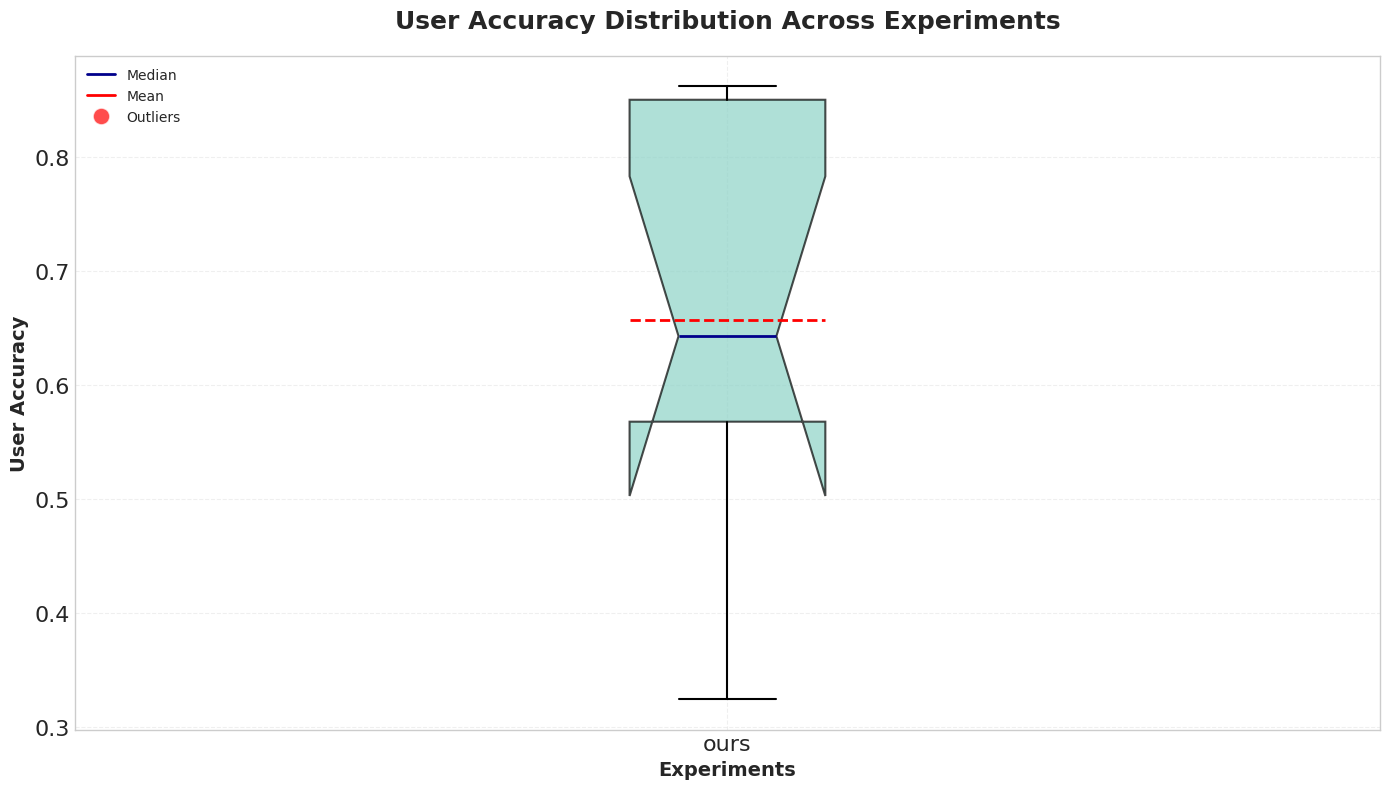

In [6]:
USERS = 10
ROUNDS = 500
exp_paths = {
    # "fedavg": "exp_office_caltech_alexnet/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    # "fedprox": "exp_office_caltech_alexnet/fedprox_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    # "ditto": "exp_office_caltech_alexnet/ditto_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2", 
    # "local": "exp_office_caltech_alexnet/local_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    # "pfedme": "exp_office_caltech_alexnet/PFedMe_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "ours": "exp_office_caltech_alexnet/fdse_fdse_alexnet_on_office_caltech_lr0.01_lstep2",
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)

Processing experiment: fedavg at exp_office_31/fedavg_office_caltech_alexnet_on_office_31_lr0.01_lstep2
["{'Role': 'Client #1', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.786262085943511, 'test_acc': 0.2878787878787879, 'test_total': 66, 'test_correct': 19.0, 'test_loss': 183.89329767227173, 'val_avg_loss': 2.172893626349313, 'val_acc': 0.453781512605042, 'val_total': 119, 'val_correct': 54.0, 'val_loss': 258.57434153556824}}\n", "{'Role': 'Client #2', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.7161555353379407, 'test_acc': 0.32450331125827814, 'test_total': 151, 'test_correct': 49.0, 'test_loss': 410.13948583602905, 'val_avg_loss': 1.907321485327037, 'val_acc': 0.4334763948497854, 'val_total': 233, 'val_correct': 101.0, 'val_loss': 444.40590608119965}}\n", "{'Role': 'Client #3', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.330814356274075, 'test_acc': 0.3888888888888889, 'test_total': 180, 'test_correct': 70.0, 'test_loss': 419.5465841293335, 'val_avg_loss': 2.35155864

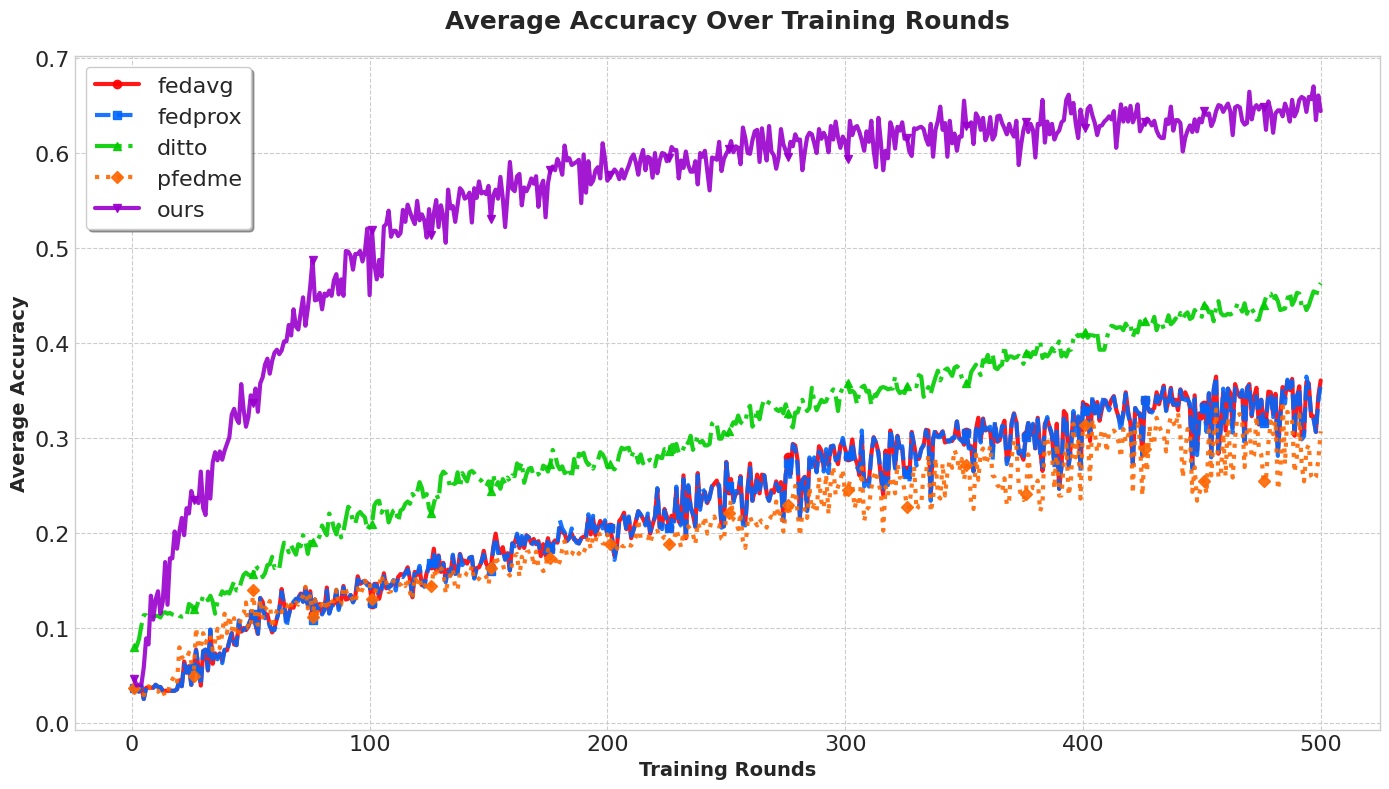

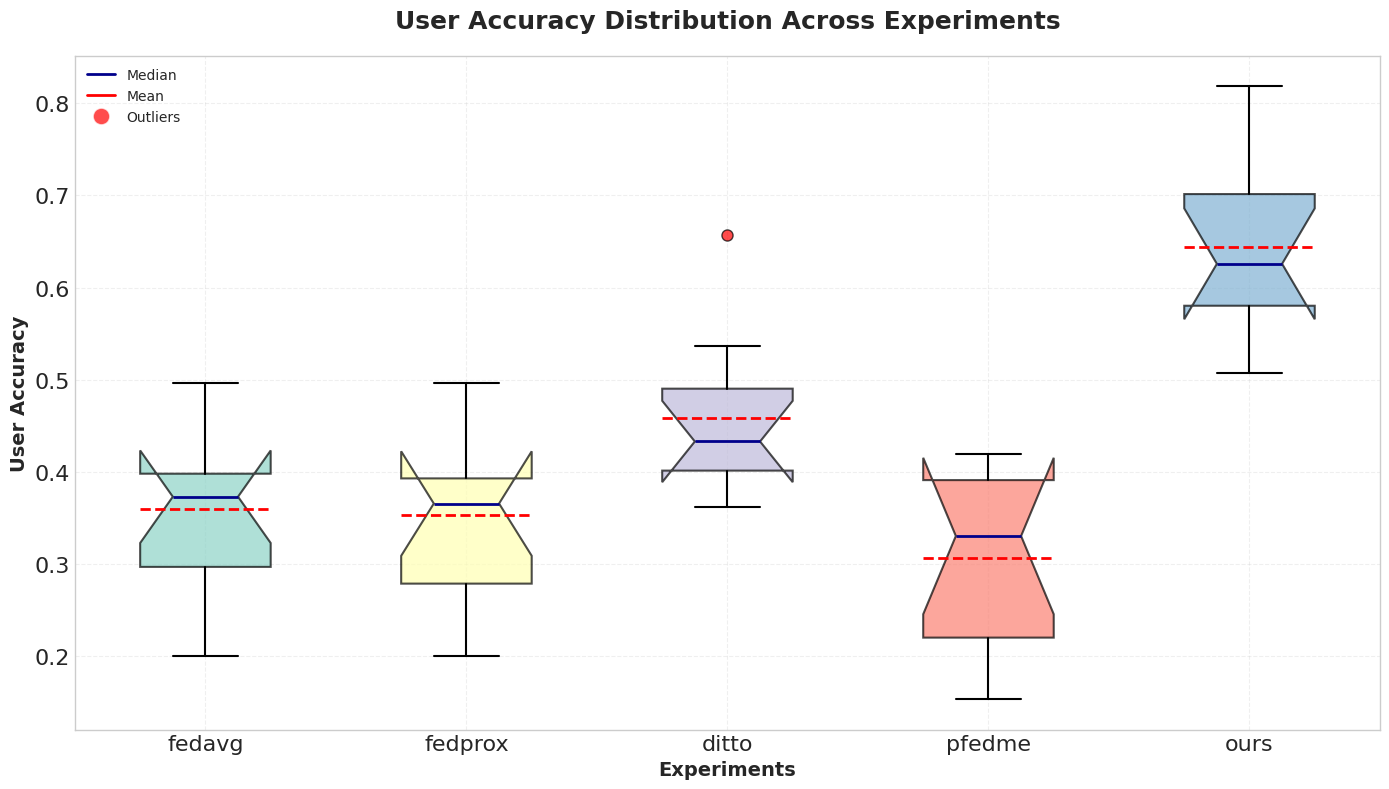

In [7]:
USERS = 10
ROUNDS = 500
exp_paths = {
    "fedavg": "exp_office_31/fedavg_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "fedprox": "exp_office_31/fedprox_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "ditto": "exp_office_31/ditto_office_caltech_alexnet_on_office_31_lr0.01_lstep2", 
    # "local": "exp_office_31/local_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "pfedme": "exp_office_31/PFedMe_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "ours": "exp_office_31/fdse_fdse_alexnet_on_office_31_lr0.01_lstep2",
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)

Processing experiment: fedavg at exp_office_caltech_alexnet/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2
["{'Role': 'Client #1', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.8241667870817513, 'test_correct': 90.0, 'test_total': 232, 'test_loss': 423.2066946029663, 'test_acc': 0.3879310344827586, 'val_avg_loss': 1.4991581975342985, 'val_correct': 177.0, 'val_total': 334, 'val_loss': 500.7188379764557, 'val_acc': 0.5299401197604791}}\n", "{'Role': 'Client #2', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.1811037087204435, 'test_correct': 15.0, 'test_total': 101, 'test_loss': 220.29147458076477, 'test_acc': 0.1485148514851485, 'val_avg_loss': 1.8698870376501668, 'val_correct': 58.0, 'val_total': 179, 'val_loss': 334.7097797393799, 'val_acc': 0.3240223463687151}}\n", "{'Role': 'Client #3', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.4184133847554525, 'test_correct': 40.0, 'test_total': 120, 'test_loss': 290.2096061706543, 'test_acc': 0.3333333333333333, 'val_a

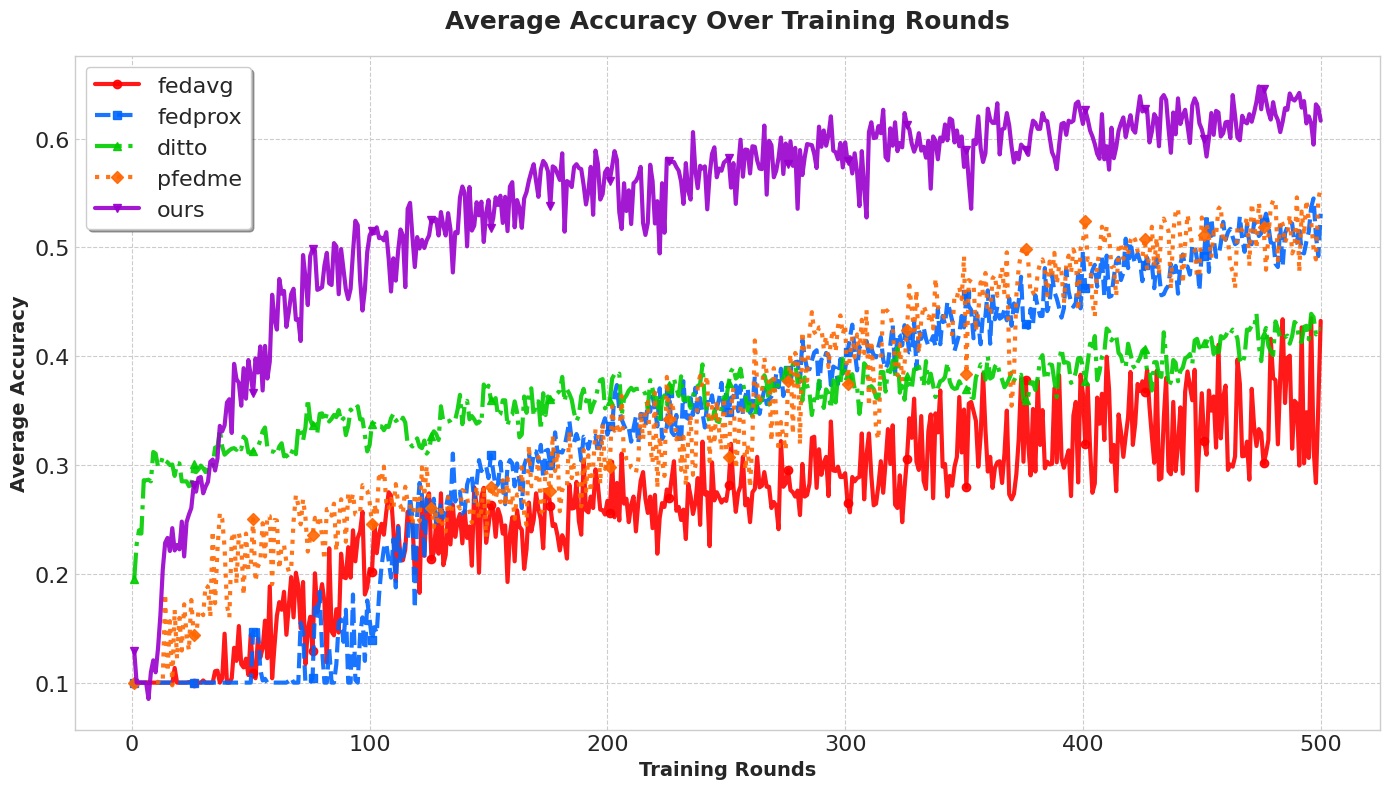

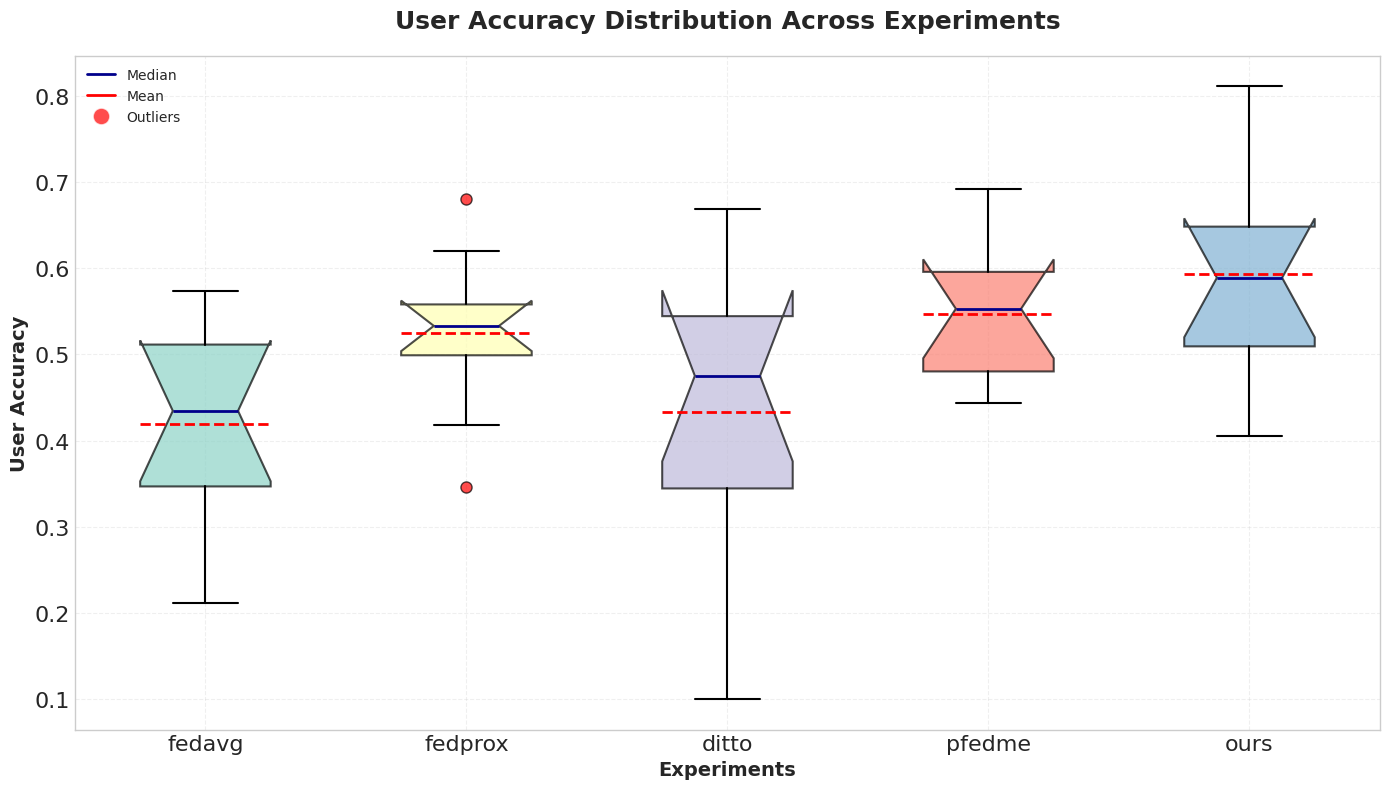

In [8]:
USERS = 10
ROUNDS = 500
exp_paths = {
    "fedavg": "exp_office_caltech_alexnet/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "fedprox": "exp_office_caltech_alexnet/fedprox_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "ditto": "exp_office_caltech_alexnet/ditto_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2", 
    # "local": "exp_office_caltech_alexnet/local_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "pfedme": "exp_office_caltech_alexnet/PFedMe_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "ours": "exp_office_caltech_alexnet/fdse_fdse_alexnet_on_office_caltech_lr0.01_lstep2",
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, "val_acc")
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, "val_acc")
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)

Processing experiment: fedavg at exp_office_31/fedavg_office_caltech_alexnet_on_office_31_lr0.01_lstep2
["{'Role': 'Client #1', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.786262085943511, 'test_acc': 0.2878787878787879, 'test_total': 66, 'test_correct': 19.0, 'test_loss': 183.89329767227173, 'val_avg_loss': 2.172893626349313, 'val_acc': 0.453781512605042, 'val_total': 119, 'val_correct': 54.0, 'val_loss': 258.57434153556824}}\n", "{'Role': 'Client #2', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.7161555353379407, 'test_acc': 0.32450331125827814, 'test_total': 151, 'test_correct': 49.0, 'test_loss': 410.13948583602905, 'val_avg_loss': 1.907321485327037, 'val_acc': 0.4334763948497854, 'val_total': 233, 'val_correct': 101.0, 'val_loss': 444.40590608119965}}\n", "{'Role': 'Client #3', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.330814356274075, 'test_acc': 0.3888888888888889, 'test_total': 180, 'test_correct': 70.0, 'test_loss': 419.5465841293335, 'val_avg_loss': 2.35155864

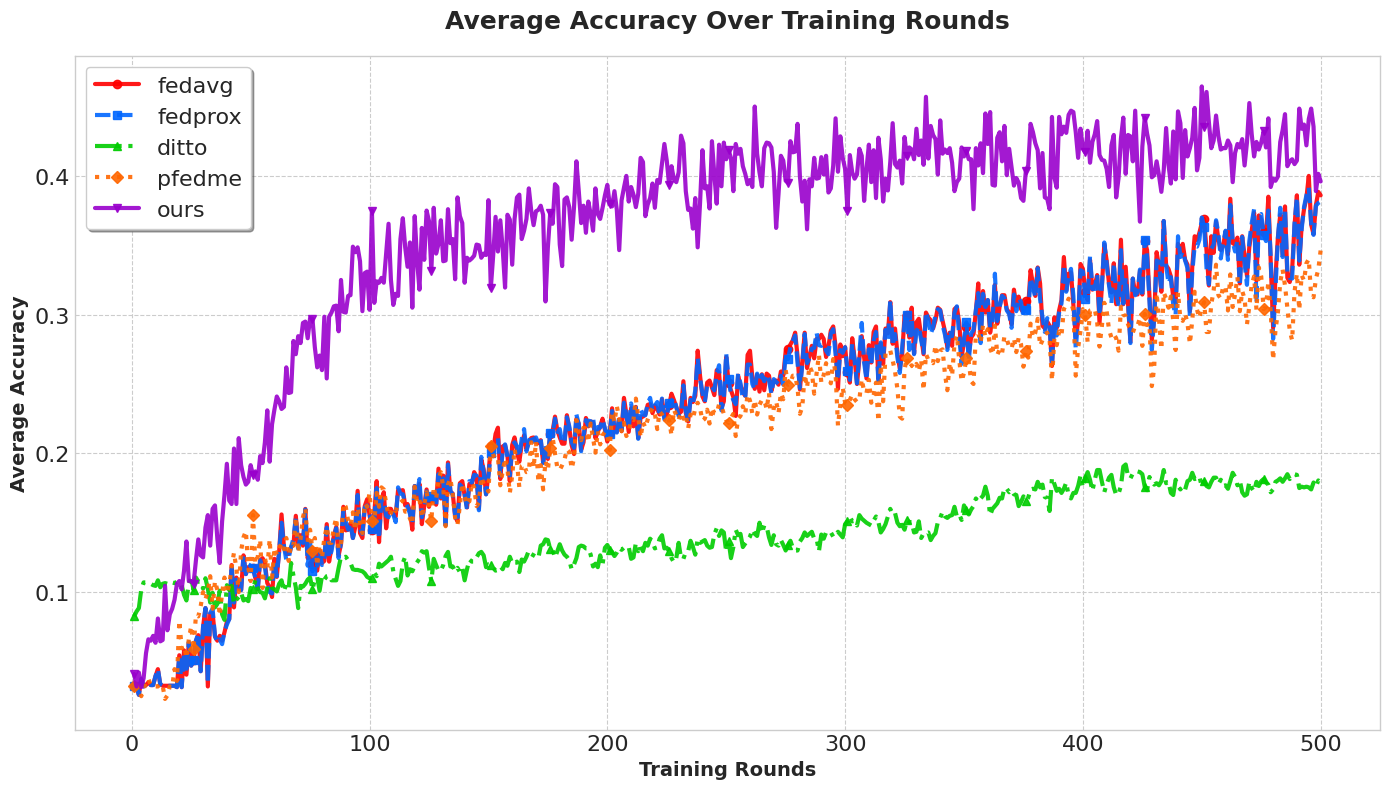

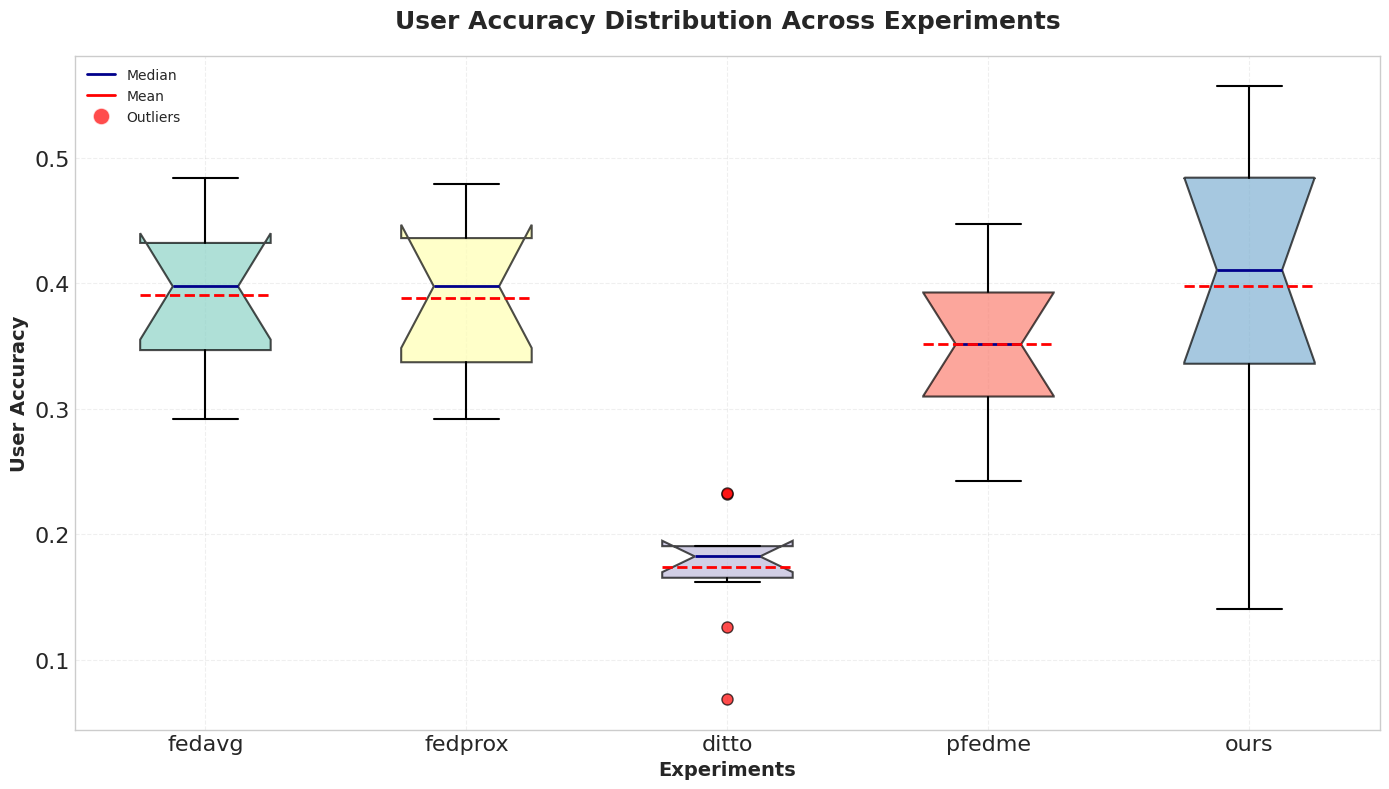

In [9]:
USERS = 10
ROUNDS = 500
exp_paths = {
    "fedavg": "exp_office_31/fedavg_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "fedprox": "exp_office_31/fedprox_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "ditto": "exp_office_31/ditto_office_caltech_alexnet_on_office_31_lr0.01_lstep2", 
    # "local": "exp_office_31/local_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "pfedme": "exp_office_31/PFedMe_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "ours": "exp_office_31/fdse_fdse_alexnet_on_office_31_lr0.01_lstep2",
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, "val_acc")
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, "val_acc")
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)